# Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets:

1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.

3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 

4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


Attribute Information:

Input variables:
### bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced 
or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the 
output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')



# Importing  libraries

In [51]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import missingno as msno
import warnings

import itertools
from itertools import chain


from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,roc_curve,accuracy_score


warnings.filterwarnings('ignore')

In [52]:
#import dataset
bank = pd.read_csv('G:/data/dataset/bank-marketing/bank-additional/bank-additional-full.csv', sep = ';')

# Exploratory Data Analysis

In [53]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [54]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

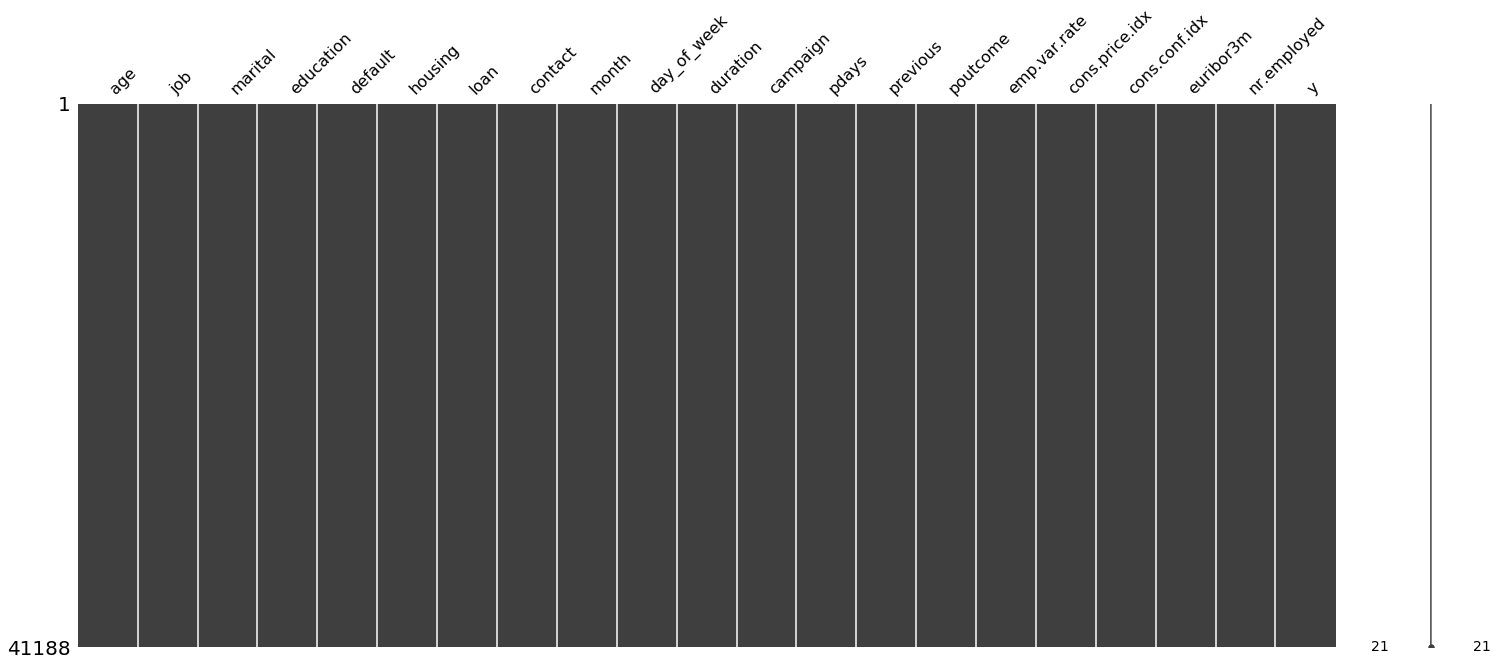

In [55]:

null=msno.matrix(bank)
plt.savefig('null.png')

In [56]:
bank.shape

(41188, 21)

bank[bank['pdays']==999]
#bank_related [bank_related['duration'] > 640].count()

### Numerical Data Analysis

In [57]:
bank.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


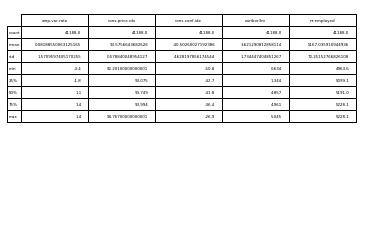

In [58]:
import matplotlib.pyplot as plt
from pandas.plotting import table

desc = bank.loc[:,['age','duration','campaign','pdays','previous']].describe()
desc1 = bank.loc[:,['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']].describe()
#create a subplot without frame
plot = plt.subplot(111, frame_on=False)

#remove axis
plot.xaxis.set_visible(False) 
plot.yaxis.set_visible(False) 

#create the table plot and position it in the upper left corner
table(plot, desc,loc='upper right')
table(plot, desc1,loc='upper right')
#save the plot as a png file
plt.savefig('desc_plot.png')
plt.savefig('desc1_plot.png')

AGE:

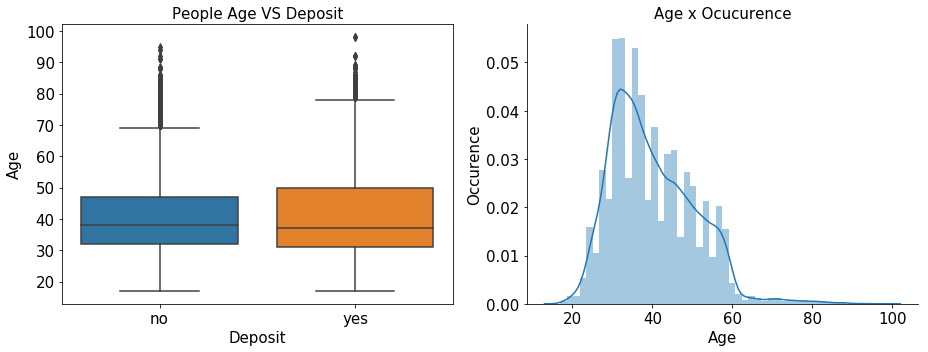

In [59]:
age, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot( x='y',y = 'age', data = bank, orient = 'v', ax = ax1)
ax1.set_xlabel('Deposit', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('People Age VS Deposit', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(bank['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 
plt.savefig('age.png')

In [60]:
# Quartiles
print('1º Quartile: ', bank['age'].quantile(q = 0.25))
print('2º Quartile: ', bank['age'].quantile(q = 0.50))
print('3º Quartile: ', bank['age'].quantile(q = 0.75))
print('4º Quartile: ', bank['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', bank['age'].quantile(q = 0.75) + 
                      1.5*(bank['age'].quantile(q = 0.75) 
                           - bank['age'].quantile(q = 0.25)),
      'are outliers')
print('Numerber of outliers: ', bank[bank['age'] > 69.6]['age'].count())
print('Number of clients: ', len(bank))
#Outliers in %
print('Outliers are:', round(bank[bank['age'] > 69.6]['age'].count()*100/len(bank),2), '%')
print('CV  :',round(bank['age'].std()*100/bank['age'].mean(), 1), ', High middle dispersion')

1º Quartile:  32.0
2º Quartile:  38.0
3º Quartile:  47.0
4º Quartile:  98.0
Ages above:  69.5 are outliers
Numerber of outliers:  469
Number of clients:  41188
Outliers are: 1.14 %
CV  : 26.0 , High middle dispersion


Duration

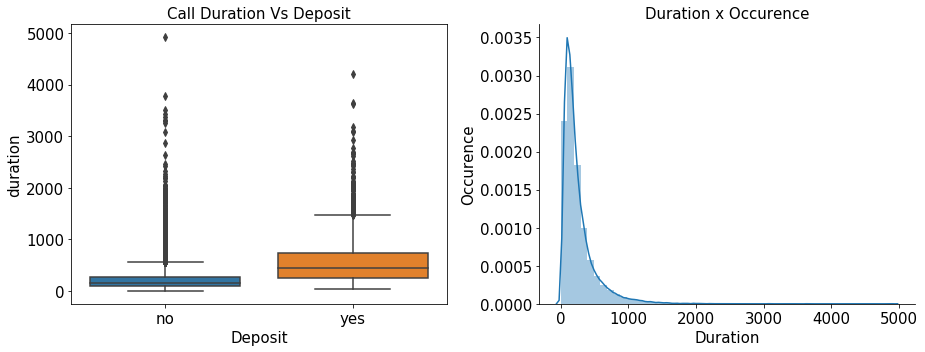

In [61]:
duration, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x='y',y = 'duration', data = bank, orient = 'v', ax = ax1)
ax1.set_xlabel('Deposit', fontsize=15)
ax1.set_ylabel('duration', fontsize=15)
ax1.set_title('Call Duration Vs Deposit', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(bank['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Duration x Occurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 
plt.savefig('duration.png')

In [62]:
print("Max duration  call in minutes:  ", round((bank['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((bank['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((bank['duration'].mean()/60),1))
print("STD duration  call in minutes:   ", round((bank['duration'].std()/60),1))
# Std close to the mean means that the data values are close to the mean 

Max duration  call in minutes:   82.0
Min duration  call in minutes:    0.0
Mean duration call in minutes:    4.3
STD duration  call in minutes:    4.3


In [63]:
# Quartiles
print('1º Quartile: ', bank['duration'].quantile(q = 0.25))
print('2º Quartile: ', bank['duration'].quantile(q = 0.50))
print('3º Quartile: ', bank['duration'].quantile(q = 0.75))
print('4º Quartile: ', bank['duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('duration above: ', bank['duration'].quantile(q = 0.75) + 
                      1.5*(bank['duration'].quantile(q = 0.75) 
                           - bank['duration'].quantile(q = 0.25)),
      'are outliers')
print('Numerber of outliers: ', bank[bank['duration'] > 69.6]['duration'].count())
print('Number of clients: ', len(bank))
#Outliers in %
print('Outliers are:', round(bank[bank['duration'] > 69.6]['duration'].count()*100/len(bank),2), '%')
print('CV  :',round(bank['duration'].std()*100/bank['duration'].mean(), 1), ', High middle dispersion')

1º Quartile:  102.0
2º Quartile:  180.0
3º Quartile:  319.0
4º Quartile:  4918.0
duration above:  644.5 are outliers
Numerber of outliers:  35757
Number of clients:  41188
Outliers are: 86.81 %
CV  : 100.4 , High middle dispersion


Campaign

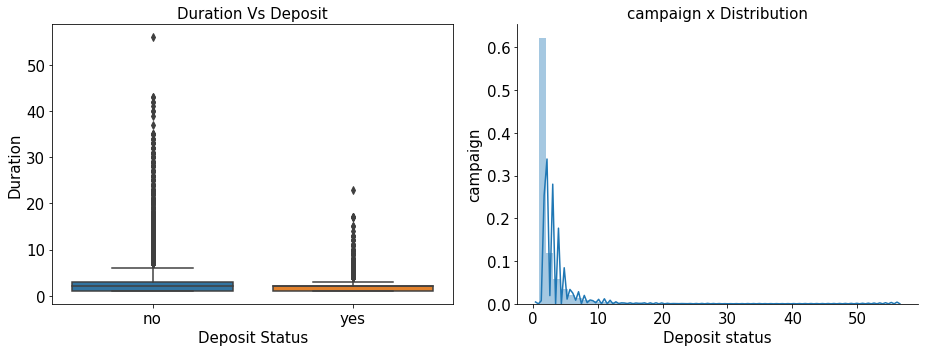

In [64]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x='y',y = 'campaign', data = bank, orient = 'v', ax = ax1)
ax1.set_xlabel('Deposit Status', fontsize=15)
ax1.set_ylabel('Duration', fontsize=15)
ax1.set_title('Duration Vs Deposit', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(bank['campaign'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Deposit status', fontsize=15)
ax2.set_ylabel('campaign', fontsize=15)
ax2.set_title('campaign x Distribution', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

pdays: number of days that passed by after the client was last contacted from a previous campaign

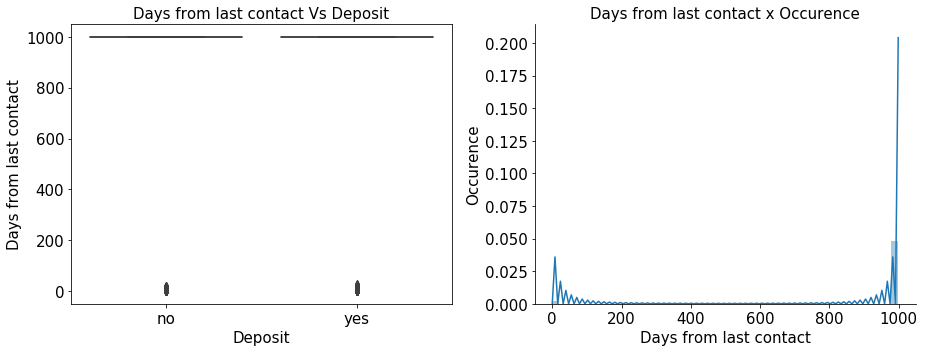

In [65]:
fig1, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x='y',y = 'pdays', data = bank, orient = 'v', ax = ax1)
ax1.set_xlabel('Deposit', fontsize=15)
ax1.set_ylabel('Days from last contact', fontsize=15)
ax1.set_title('Days from last contact Vs Deposit', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(bank['pdays'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Days from last contact', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Days from last contact x Occurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 
plt.savefig("fig1.png")

Previous

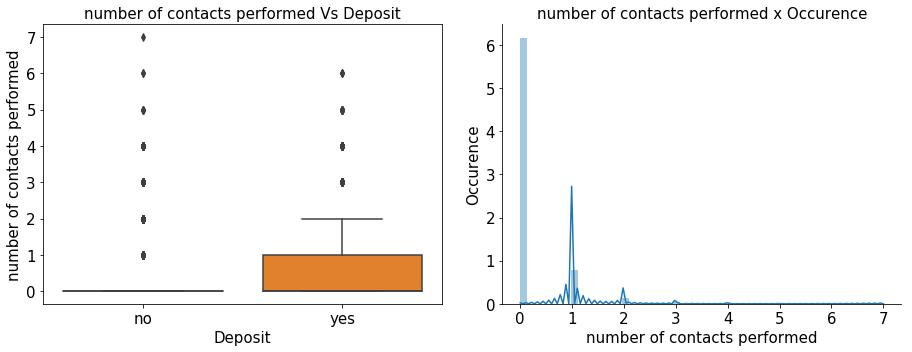

In [66]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x='y',y = 'previous', data = bank, orient = 'v', ax = ax1)
ax1.set_xlabel('Deposit', fontsize=15)
ax1.set_ylabel('number of contacts performed', fontsize=15)
ax1.set_title('number of contacts performed Vs Deposit', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(bank['previous'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('number of contacts performed', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('number of contacts performed x Occurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

Consumer Index Price

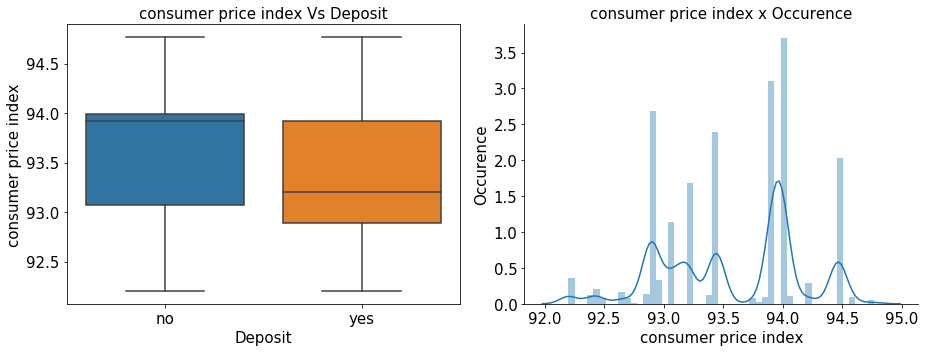

In [67]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x='y',y = 'cons.price.idx', data = bank, orient = 'v', ax = ax1)
ax1.set_xlabel('Deposit', fontsize=15)
ax1.set_ylabel('consumer price index', fontsize=15)
ax1.set_title('consumer price index Vs Deposit', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(bank['cons.price.idx'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('consumer price index', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('consumer price index x Occurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

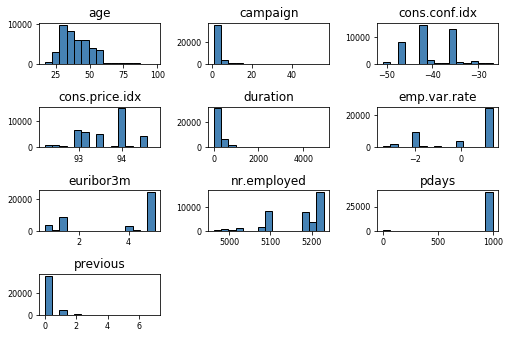

In [68]:
distribution=bank.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
                       xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 
plt.savefig("distribution.png")

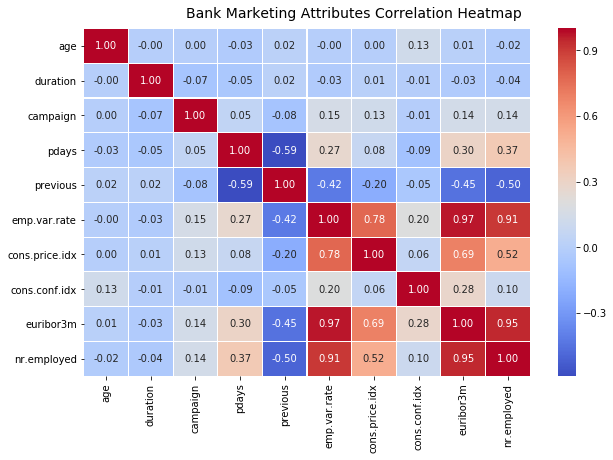

In [69]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = bank.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.08)
f.subplots_adjust(top=0.93)
t= f.suptitle('Bank Marketing Attributes Correlation Heatmap', fontsize=14)
plt.savefig("t")

### Categorical data analysis:

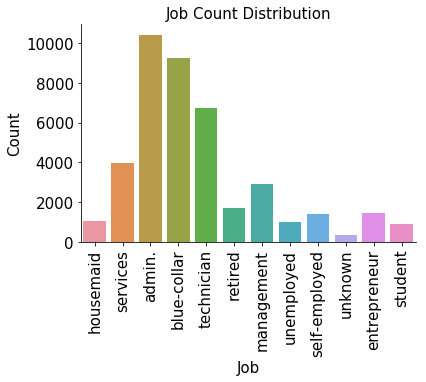

In [70]:
##jobs
# What kind of jobs clients this bank have,
# if you cross jobs with default, loan or housing, there is no relation
jobs, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = bank)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(axis = 'x',labelsize=15,rotation=90)
ax.tick_params(axis = 'y',labelsize=15)
sns.despine()
plt.savefig('jobs.png')

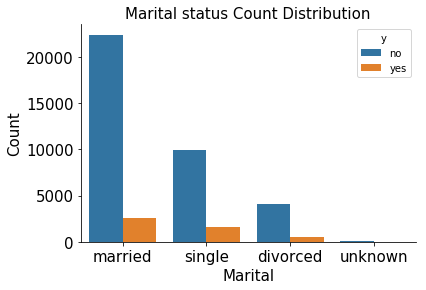

In [71]:
#Marital
# What kind of 'marital clients' this bank have, if you cross marital with default, loan or housing, there is no relation
marital, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital',hue='y', data = bank)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital status Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()
plt.savefig('marital.png')

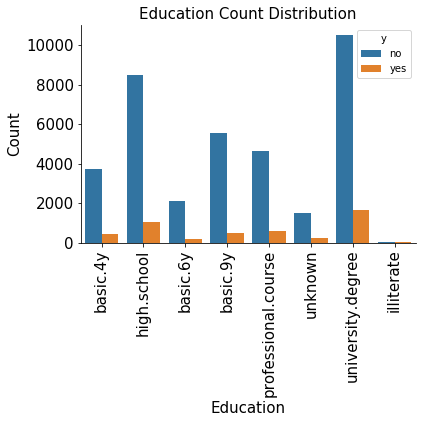

In [72]:
#1.5. EDUCATION
# What kind of 'education clients this bank
# have, if you cross education with default,
# loan or housing, there is no relation
edu, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education',hue='y', data = bank)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(axis = 'x',labelsize=15,rotation=90)
ax.tick_params(axis = 'y',labelsize=15)
sns.despine()
plt.savefig('edu.png')

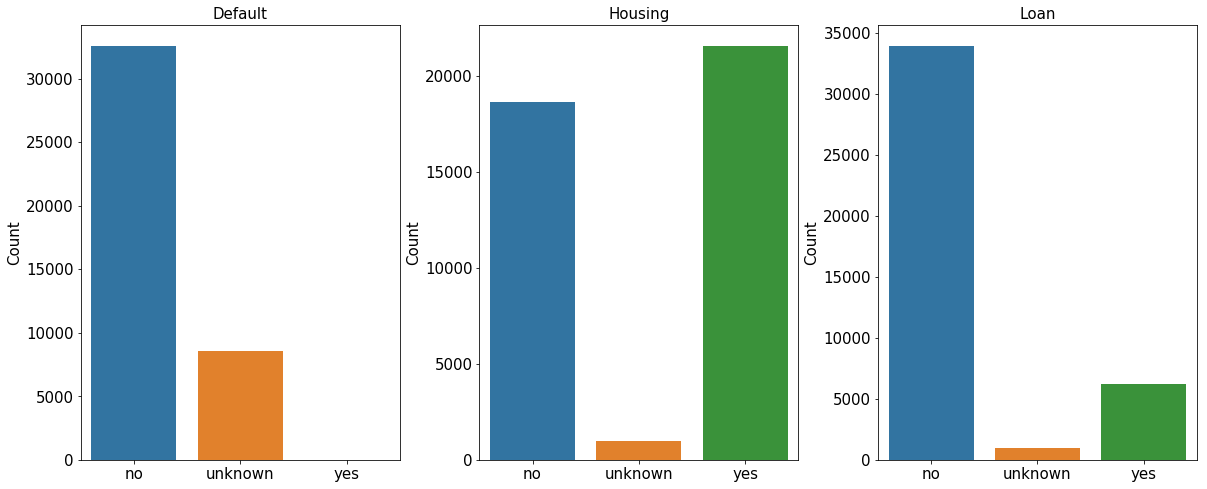

In [73]:
# Default, has credit in default ?
dhl, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = bank, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = bank, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = bank, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)
plt.savefig('dhl.png')

Analysis Report:
    

# Preprocessing

Removing the outliers:

In [74]:
print('Duration above: ', bank['duration'].quantile(q = 0.75) + 
                      1.5*(bank['duration'].quantile(q = 0.75) - bank['duration'].quantile(q = 0.25)), 'are outliers')

Duration above:  644.5 are outliers


In [75]:
bank [bank['duration'] > 640].count()

age               3008
job               3008
marital           3008
education         3008
default           3008
housing           3008
loan              3008
contact           3008
month             3008
day_of_week       3008
duration          3008
campaign          3008
pdays             3008
previous          3008
poutcome          3008
emp.var.rate      3008
cons.price.idx    3008
cons.conf.idx     3008
euribor3m         3008
nr.employed       3008
y                 3008
dtype: int64

Label encoding for categorical variables

In [76]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
bank['job']              = label.fit_transform(bank['job']) 
bank['marital']          = label.fit_transform(bank['marital']) 
bank['education']        = label.fit_transform(bank['education']) 
bank['default']          = label.fit_transform(bank['default']) 
bank['housing']          = label.fit_transform(bank['housing']) 
bank['loan']             = label.fit_transform(bank['loan']) 
bank['contact']          = label.fit_transform(bank['contact']) 
bank['month']            = label.fit_transform(bank['month']) 
bank['day_of_week']      = label.fit_transform(bank['day_of_week']) 
bank['poutcome']         = label.fit_transform(bank['poutcome']) 
bank['y']                = label.fit_transform(bank['y']) 

In [77]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank);

In [78]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(bank);

# Scaling

In [79]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null int64
marital           41188 non-null int64
education         41188 non-null int64
default           41188 non-null int64
housing           41188 non-null int64
loan              41188 non-null int64
contact           41188 non-null int64
month             41188 non-null int64
day_of_week       41188 non-null int64
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null int64
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(16)
memory usage: 6.6 MB


In [80]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X= bank.drop('y',axis=1)
y =bank['y']
b_scaled=pd.DataFrame(scale.fit_transform(X),columns=['age','job','marital','education','default','housing',
                                                      'loan','contact','month','day_of_week','duration','campaign',
                                                      'pdays','previous','poutcome','emp.var.rate','cons.price.idx',
                                                      'cons.conf.idx',
                                                      'euribor3m','nr.employed'])

In [81]:
b_scaled.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.388231,-0.201579,-0.283741,-1.753925,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.348401,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.71246,0.33168
1,1.388231,0.911227,-0.283741,-0.349730,1.945327,-1.087707,-0.452491,1.31827,0.762558,-0.718834,-0.459182,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.71246,0.33168
2,0.029072,0.911227,-0.283741,-0.349730,-0.513600,0.942127,-0.452491,1.31827,0.762558,-0.718834,0.348401,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.71246,0.33168
3,0.029072,-1.036184,-0.283741,-1.285860,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,-0.459182,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.71246,0.33168
4,1.388231,0.911227,-0.283741,-0.349730,-0.513600,-1.087707,2.311440,1.31827,0.762558,-0.718834,0.348401,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.71246,0.33168


In [82]:
#Implementing PCA:
#PCA

pca = PCA(n_components=5)  #two component
principalComponents = pca.fit_transform(b_scaled)
b_p = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2',
                         'principal component 3', 'principal component 4',
                         'principal component 5'])

In [83]:

print('components_ :',pca.components_)



components_ : [[-2.94601521e-02  1.30915620e-02  6.22720177e-02  4.66897089e-02
  -1.33457789e-01  4.34270763e-02  1.05522415e-03 -2.58431666e-01
   6.43031278e-02 -1.32629111e-02  4.10214558e-02 -9.45898357e-02
  -1.87670357e-01  2.85942552e-01 -1.10993788e-01 -4.61105838e-01
  -3.67605004e-01 -1.13191793e-01 -4.61894548e-01 -4.33893231e-01]
 [ 1.34954166e-01  3.84533542e-02 -7.30766807e-02 -1.39837368e-02
   2.91750449e-02 -6.56880054e-02 -2.24020560e-02  2.57648131e-01
   1.83195138e-01  4.76930089e-02  1.33573904e-01 -5.05334983e-02
  -6.12833712e-01  2.47765854e-01  4.86974199e-01  2.10178412e-02
   2.07429785e-01  3.31935970e-01  1.45783376e-02 -1.36132013e-01]
 [ 5.00696283e-01 -1.85010906e-01 -4.85800969e-01 -4.31794530e-01
   3.24141060e-01 -3.41571294e-02 -1.79152260e-02  1.44625543e-01
   2.42692372e-01 -2.74711202e-02  9.24852250e-04 -4.27643111e-02
   1.39415618e-01  6.43459001e-02 -2.43978245e-01 -7.98120887e-02
  -4.10931300e-05 -5.11500472e-02 -6.94577060e-02 -8.2197348

In [84]:
print('explained_variance_:',pca.explained_variance_)

explained_variance_: [4.27539353 1.68597945 1.53396203 1.34785226 1.13660219]


In [85]:
print('explained_variance_ratio_:',pca.explained_variance_ratio_)

explained_variance_ratio_: [0.21376449 0.08429693 0.07669624 0.06739098 0.05682873]


In [86]:
print('singular_values_:',pca.singular_values_)

singular_values_: [419.63154492 263.51553207 251.35491677 235.61407255 216.36366198]


In [87]:
print('mean_:',pca.mean_)

mean_: [-9.91944433e-17 -6.38294679e-17 -2.70843958e-17 -5.38237675e-17
 -6.62446369e-17 -7.07299509e-18  7.08162069e-17 -1.10407728e-17
  7.03849267e-17 -3.99365454e-17  3.17422219e-17 -7.59053131e-17
 -2.58078065e-16  5.52038641e-18 -3.34673426e-17  7.79754580e-17
  8.66700666e-15 -1.35249467e-16  0.00000000e+00 -1.02485974e-14]


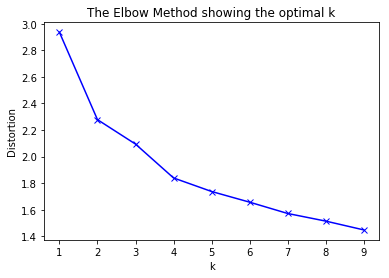

In [88]:
from sklearn import metrics
from scipy.spatial.distance import cdist
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(b_p)
    kmeanModel.fit(b_p)
    distortions.append(sum(np.min(cdist(b_p, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / b_p.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [89]:
#K-Means
# Number of clusters
kmeans = KMeans(n_clusters=4)
kmeansPCA = kmeans.fit(b_p)
#Getting the cluster labels
labels = kmeans.predict(b_p)
b_p['k_clust']=labels

# Modelling

Splitting the data into Train and test

In [90]:
random_state = 101

X= bank.drop('y',axis=1)
y =bank['y']
x = b_p
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 101)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 101)

 precision_score,recall_score,confusion_matrix,roc_curve,precision_recall_curve,accuracy_score


In [91]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
from sklearn.linear_model import LogisticRegression


In [92]:
logmodel = LogisticRegression() 
logmodel.fit(x_train,y_train)
y_pred = logmodel.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(round(accuracy_score(y_test, y_pred),2)*100)
logCV = (cross_val_score(logmodel, x_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(logCV)

[[7198   81]
 [ 761  198]]
90.0
0.8984522003034903


In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.90      0.99      0.94      7279
          1       0.71      0.21      0.32       959

avg / total       0.88      0.90      0.87      8238



In [94]:
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
Y_pred = logmodel.predict(X_test)

print(confusion_matrix(y_test, Y_pred))
print(round(accuracy_score(y_test, Y_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(LOGCV)

[[7118  161]
 [ 631  328]]
90.0
0.9099848254931715


In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred))

             precision    recall  f1-score   support

          0       0.92      0.98      0.95      7279
          1       0.67      0.34      0.45       959

avg / total       0.89      0.90      0.89      8238



In [96]:
#Confusion matrix
def plot_confusion_matrix(cm,classes,
                          normalize = False,    
                          title ='Confusion matrix',
                          cmap =plt.cm.Blues):
    plt.imshow(cm,interpolation = 'nearest',cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation = 0)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max()/2.
    for i ,j, in itertools.product(range(cm.shape[0]),
                                  range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment = 'center',
                color = 'white' if cm[i,j] > thresh else 'black')
        plt.tight_layout()
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')

In [97]:
print(confusion_matrix(y_test,y_pred))
print(confusion_matrix(y_test,Y_pred))

[[7198   81]
 [ 761  198]]
[[7118  161]
 [ 631  328]]


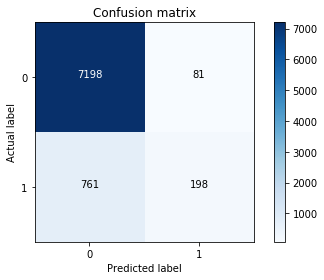

In [98]:
class_names = [0,1]
cm = confusion_matrix(y_test, y_pred)

c1=plot_confusion_matrix(cm,classes=class_names)
plt.savefig('c1.png')

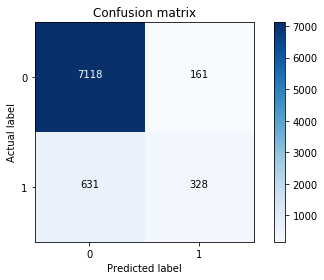

In [99]:
cm1 = confusion_matrix(y_test, Y_pred)
c=plot_confusion_matrix(cm1,classes=class_names)
plt.savefig('c.png')

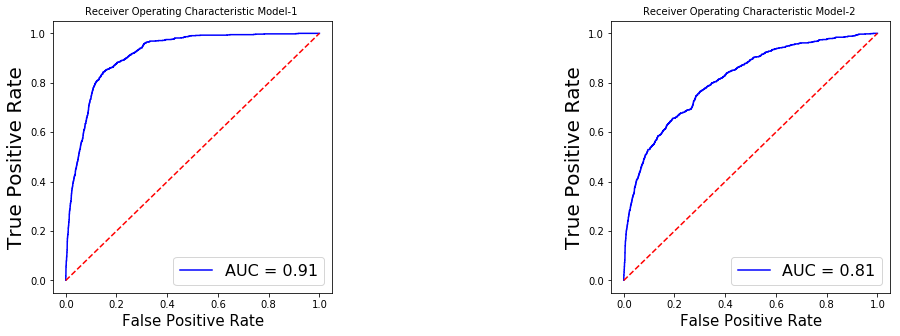

In [100]:
# XGBOOST ROC/ AUC , BEST MODEL
from sklearn import metrics
roc, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
logmodel.fit(X_train,y_train)
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

ax.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Model-1 ',fontsize=10)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

#Model-2
logmodel.fit(x_train,y_train)
probs = logmodel.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc= metrics.auc(fpr, tpr)

ax1.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_title('Receiver Operating Characteristic Model-2 ',fontsize=10)
ax1.set_ylabel('True Positive Rate',fontsize=20)
ax1.set_xlabel('False Positive Rate',fontsize=15)
ax1.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

plt.savefig('roc.png')